# Carlos Armando Figueroa Pérez A01707473

# Romel Aldair Vázquez Molina A01700519

# Joaquín Antonio Díez Rodríguez A01704766

In [18]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import scale
import sklearn.metrics as sm
from sklearn import datasets

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize']=(16,9)
plt.style.use('ggplot')

In [19]:
dataframe= pd.read_csv(r"athletes_IMC.csv")
dataframe

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze,IMC
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64,athletics,0,0,0,21.633315
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56,fencing,0,0,0,19.841270
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79,athletics,0,0,1,20.151005
3,521041435,Aaron Cook,MDA,male,01/02/1991,1.83,80,taekwondo,0,0,0,23.888441
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71,cycling,0,0,0,21.672110
...,...,...,...,...,...,...,...,...,...,...,...,...
10853,265605954,Zurian Hechavarria,CUB,female,08/10/1995,1.64,58,athletics,0,0,0,21.564545
10854,214461847,Zuzana Hejnova,CZE,female,12/19/86,1.73,63,athletics,0,0,0,21.049818
10855,88361042,di Xiao,CHN,male,5/14/91,1.85,100,wrestling,0,0,0,29.218408
10856,900065925,le Quoc Toan Tran,VIE,male,04/05/1989,1.60,56,weightlifting,0,0,0,21.875000


In [20]:

dataframe_numero_categoria=dataframe
dataframe_numero_categoria.sport = dataframe_numero_categoria.sport.replace({"aquatics": 1, "archery": 2, "athletics": 3,
                                                                            "badminton": 4, "basketball": 5, "canoe": 6,
                                                                            "cycling": 7, "equestrian": 8, "fencing": 9,
                                                                            "football": 10, "golf": 11, "gymnastics": 12,
                                                                            "handball": 13, "hockey": 14, "judo": 15,
                                                                            "modern pentathlon": 16,"rowing": 17,"rugby sevens": 18,
                                                                            "sailing": 19,"shooting": 20, "table tennis": 21,
                                                                            "taekwondo":22, "tennis": 23, "triathlon": 24,
                                                                            "volleyball":25, "weightlifting": 26, "wrestling": 27
                                                                            })
print(dataframe_numero_categoria.groupby('sport').size())

sport
1     1396
2      126
3     2187
4      164
5      284
6      327
7      502
8      215
9      245
10     583
11     115
12     319
13     349
14     432
15     377
16      72
17     535
18     296
19     372
20     380
21     168
22     125
23     191
24     109
25     382
26     258
27     349
dtype: int64


In [21]:
X=np.array(dataframe_numero_categoria[["height", "weight", "IMC"]])
y = np.array(dataframe_numero_categoria['sport'])
X.shape

(10858, 3)

<Figure size 2880x2880 with 0 Axes>

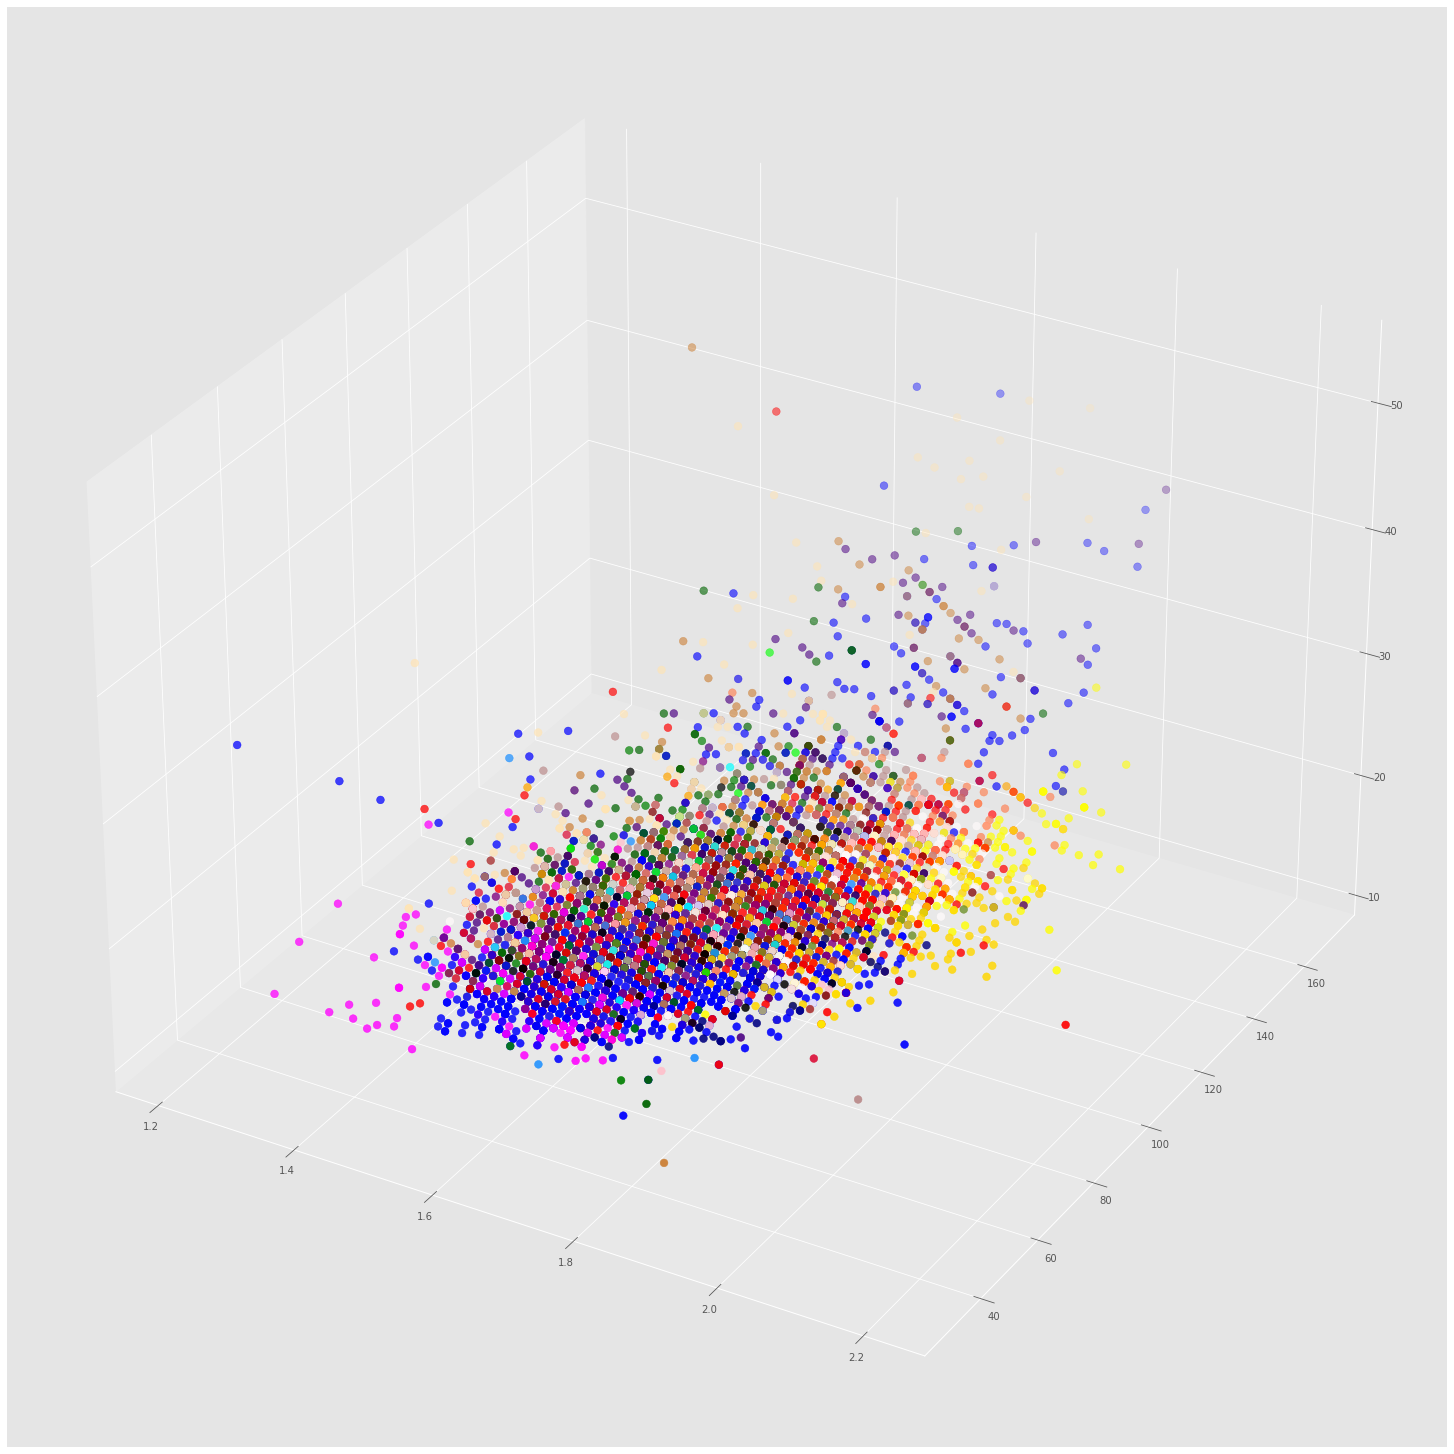

In [34]:
%matplotlib inline
plt.figure(figsize=(40,40))
fig=plt.figure(figsize=(20,20))
ax=Axes3D(fig)
colores=['blue','red','green','blue','cyan','yellow','orange','black','pink','brown','purple',
         'lime','magenta','coral','crimson','indigo','bisque','snow','rosybrown','maroon','darkgreen','dodgerblue',
         'navy','olivedrab','darkkhaki','gold','moccasin','peru','linen','hotpink','seagreen','salmon','chocolate']
asignar=[]
for row in y:
    asignar.append(colores[row])

ax.scatter(X[:,0],X[:,1],X[:,2], c=asignar, s=60)

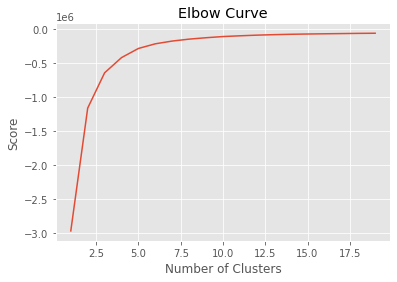

<Figure size 5760x5760 with 0 Axes>

In [37]:
Nc = range(1,20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [39]:
kmeans = KMeans(n_clusters=5).fit(X)
centroids=kmeans.cluster_centers_
print(centroids)

[[  1.65411702  54.55583304  19.97103722]
 [  1.90113832  95.11581734  26.44041434]
 [  1.82395669  78.80749398  23.76493526]
 [  1.91282869 125.03984064  34.52602582]
 [  1.74064421  66.56914894  22.04138757]]


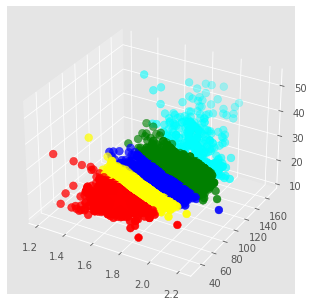

In [40]:
labels = kmeans.predict(X)
C= kmeans.cluster_centers_
colores=['red','green','blue','cyan','yellow']
asignar=[]
for row in labels:
    asignar.append(colores[row])

fig= plt.figure()
ax=Axes3D(fig)
ax.scatter(X[:,0],X[:,1],X[:,2], c=asignar, s=60)
ax.scatter(C[:,0],C[:,1],C[:,2],marker='*', c=colores, s=1000)

In [26]:
kmeans = KMeans(n_clusters=5).fit(X)
centroids=kmeans.cluster_centers_
print(centroids)

[[  1.82391274  78.80316043  23.76497875]
 [  1.91282869 125.03984064  34.52602582]
 [  1.6541399   54.55389008  19.96969454]
 [  1.74058824  66.56370086  22.04083131]
 [  1.90113832  95.11581734  26.44041434]]


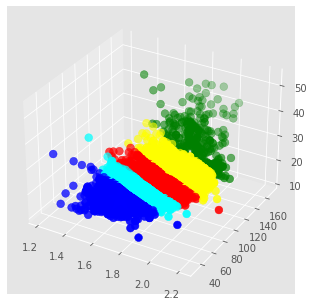

In [27]:
labels = kmeans.predict(X)
C= kmeans.cluster_centers_
colores=['red','green','blue','cyan','yellow']
asignar=[]
for row in labels:
    asignar.append(colores[row])

fig= plt.figure()
ax=Axes3D(fig)
ax.scatter(X[:,0],X[:,1],X[:,2], c=asignar, s=60)
ax.scatter(C[:,0],C[:,1],C[:,2],marker='*', c=colores, s=1000)

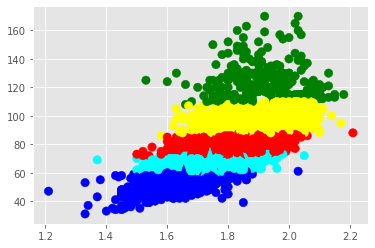

In [28]:
f1 = dataframe['height'].values
f2 = dataframe['weight'].values
#"height", "weight", "IMC"
plt.scatter(f1,f2, c=asignar, s=70)
plt.scatter(C[:,0], C[:,1], marker = '*', c=colores, s=1000)
plt.show()

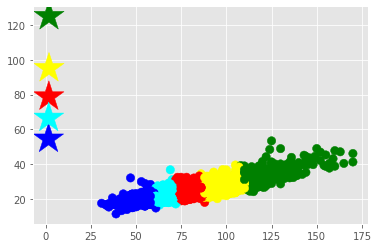

In [29]:
f1 = dataframe['weight'].values
f2 = dataframe['IMC'].values

plt.scatter(f1,f2, c=asignar, s=70)
plt.scatter(C[:,0], C[:,1], marker = '*', c=colores, s=1000)
plt.show()

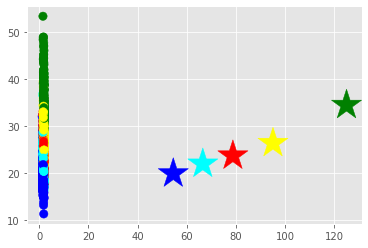

In [30]:
f1 = dataframe['height'].values
f2 = dataframe['IMC'].values

plt.scatter(f1,f2, c=asignar, s=70)
plt.scatter(C[:,1], C[:,2], marker = '*', c=colores, s=1000)
plt.show()

In [31]:
print (classification_report(y,labels));

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.04      0.01      0.01      1396
           2       0.01      0.25      0.02       126
           3       0.19      0.29      0.23      2187
           4       0.00      0.04      0.01       164
           5       0.00      0.00      0.00       284
           6       0.00      0.00      0.00       327
           7       0.00      0.00      0.00       502
           8       0.00      0.00      0.00       215
           9       0.00      0.00      0.00       245
          10       0.00      0.00      0.00       583
          11       0.00      0.00      0.00       115
          12       0.00      0.00      0.00       319
          13       0.00      0.00      0.00       349
          14       0.00      0.00      0.00       432
          15       0.00      0.00      0.00       377
          16       0.00      0.00      0.00        72
          17       0.00    

C:\Users\ravml\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ravml\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


¿Crees que estos centros puedan ser representativos de los datos? ¿Por qué?
Si, ya que gracias a esto se pueden clasificar subgrupos dentro de estos deportistas, para que se puedan comparar de acuerdo a otros atletas que tengan las mismas capacidades que ellos. Por lo cual, no se debe de comparar a un triatleta con un luchador, ya que practican deportes distintos.


¿Cómo obtuviste el valor de k a usar?
Separamos entre los tres distintos tipos de cuerpo (Endomorfo, Mesomorfo y Ectomorfo), donde los Endomorfo tienen un IMC más bajo y los Ectomorfo lo llegan a tener más alto, adicionalmente pusimos un rango intermerdio entre cada uno; por lo cual nos quedaron 5 clusters de K.


¿Los centros serían más representativos si usaras un valor más alto? ¿Más bajo?
Si cambiaria mucho, ya que entre más valores se tengan y sobre pasen el máximo o mínimo, este se ajustará a ese nuevo conjunto de valores bajo. Por ejemplo, en nuestro caso nuestra media IMC, más bajo era de 21, por lo que al añadir más valores por debajo de ese grupo, este tenderá a bajar aún más.


¿Qué distancia tienen los centros entre sí? ¿Hay alguno que este muy cercano a otros?
Para el caso de los Endomorfo y Mesosmorfo, los centros se encuentran muy cercanos. Mientras que para los Ectomorfo, su distancia es mayor ya que tienen un mayor peso considerable, lo cual hace que su IMC sea mucho mayor.


¿Qué pasaría con los centros si tuviéramos muchos outliers en el análisis de cajas y bigotes?
Nos alejaría mucho el valor de los centros de los extremos, en este caso pasó para los que tienen su IMC por arriba de 30 ya que varios atletas llegaron a tener un peso por encima del estandar.


¿Qué puedes decir de los datos basándose en los centros?
Que los deportes que requieren mucha potencia y musuculo para su disciplina (halterofilia, lucha, lanzamiento), tienen un IMC en estado de sobrepeso y/o obesidad. Por otro lado, los deportes que no requieren mucho musculo (triatlon y pruebas de larga distancia), tienen un IMC de apenas estar saludables; esto se debe a que sus porcentajes de grasa y de musculo llegan a estar al mínimo. Esto no quiere decir que no estén saludables, ya que siguen dietas y entrenamientos estrictos para poder ser los mejores en su disciplina.